In [1]:
#Importar Librerias
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
from imblearn.pipeline import Pipeline as ImbPipeline

In [2]:
#Cargar el dataset final
main_path="drive/MyDrive/Dataset_MP"
name= "df_final.csv"
full_path=os.path.join(main_path,name)

In [3]:
df = pd.read_csv(full_path)

In [4]:
# Crear muestra representativa, 500000 por temas de rendimiento
df_modelo, _ = train_test_split(df, train_size=500000, stratify=df['DELAYED'], random_state=42)

print("Tamaño de la muestra:", df_modelo.shape)
print("Proporción de clases:\n", df_modelo['DELAYED'].value_counts(normalize=True))

Tamaño de la muestra: (500000, 13)
Proporción de clases:
 DELAYED
0    0.81389
1    0.18611
Name: proportion, dtype: float64


In [5]:
#ENTRENAMIENTO

X = df_modelo.drop('DELAYED', axis=1)
y = df_modelo['DELAYED']

#Entrenamiento 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

colum_categorica = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
colum_numeric= ['MONTH', 'DAY', 'DAY_OF_WEEK', 'DISTANCE',
                    'SCHEDULED_DEPARTURE_sin', 'SCHEDULED_DEPARTURE_cos',
                    'SCHEDULED_ARRIVAL_sin', 'SCHEDULED_ARRIVAL_cos', 'SCHEDULED_TIME']

#Column transform, usamos standarsscaler() para las numericas y onehotencoder() para las categoricas
def get_preprocessor(model_name):
    sparse = False if model_name == "Hist Gradient Boosting" else True
    return ColumnTransformer([
        ('num', StandardScaler(), colum_numeric),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=sparse), colum_categorica)
    ])


In [6]:
#Modelos para la evaluacion con sus hiperparametros
modelos_param_grid = {
    "Regresión Logística": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            'classifier__C': [0.01, 0.1, 1, 10],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs']
        }
    },
    "Hist Gradient Boosting": {
        "model": HistGradientBoostingClassifier(random_state=42),
        "params": {
            'classifier__max_iter': [100, 200],
            'classifier__max_leaf_nodes': [31, 50]
        }
    },
    "Árbol de Decisión": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            'classifier__max_depth': [5, 10, None],
            'classifier__min_samples_split': [2, 5, 10]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(random_state=42),
        "params": {
            'classifier__num_leaves': [31, 50],
            'classifier__learning_rate': [0.05, 0.1],
            'classifier__n_estimators': [100, 200]
        }
    }
}



 Entrenando Regresión Logística sin balanceo

Mejores parámetros para Regresión Logística: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}

Mejor score F1 en validación: 0.000

Evaluación del modelo Regresión Logística (sin balanceo):

Accuracy: 0.814
Precision: 0.417
Recall: 0.0
F1 Score: 0.0

AUC-ROC: 0.637


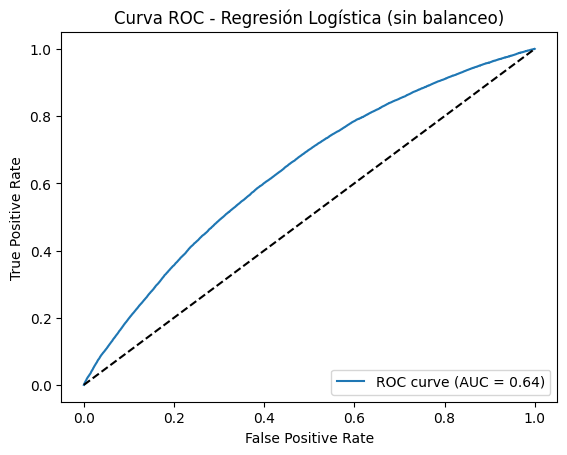


Matrix de confusión
[[101729      7]
 [ 23259      5]]

Matriz de confusión:


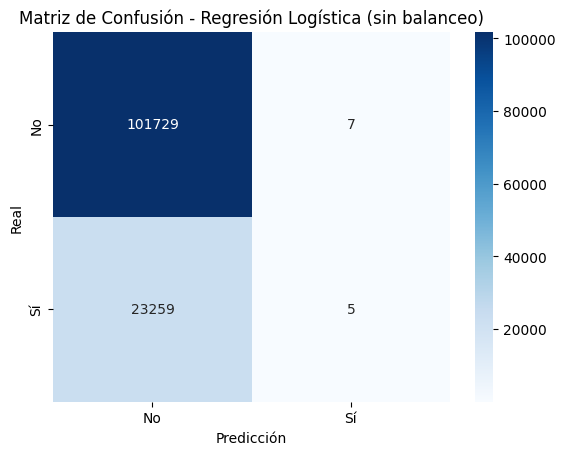


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90    101736
           1       0.42      0.00      0.00     23264

    accuracy                           0.81    125000
   macro avg       0.62      0.50      0.45    125000
weighted avg       0.74      0.81      0.73    125000



 Entrenando Hist Gradient Boosting sin balanceo

Mejores parámetros para Hist Gradient Boosting: {'classifier__max_iter': 200, 'classifier__max_leaf_nodes': 50}

Mejor score F1 en validación: 0.084

Evaluación del modelo Hist Gradient Boosting (sin balanceo):

Accuracy: 0.818
Precision: 0.662
Recall: 0.047
F1 Score: 0.087

AUC-ROC: 0.709


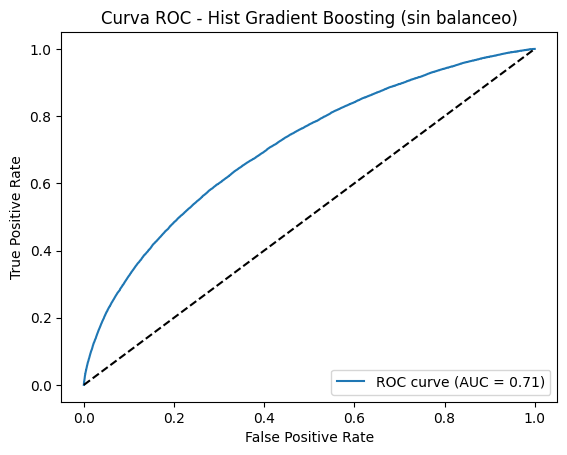


Matrix de confusión
[[101182    554]
 [ 22177   1087]]

Matriz de confusión:


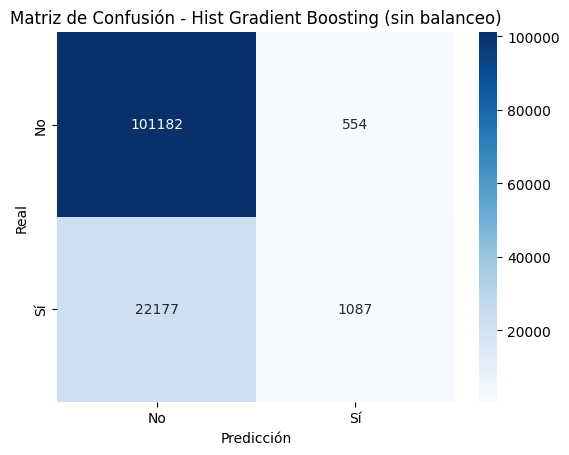


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90    101736
           1       0.66      0.05      0.09     23264

    accuracy                           0.82    125000
   macro avg       0.74      0.52      0.49    125000
weighted avg       0.79      0.82      0.75    125000



 Entrenando Árbol de Decisión sin balanceo

Mejores parámetros para Árbol de Decisión: {'classifier__max_depth': None, 'classifier__min_samples_split': 2}

Mejor score F1 en validación: 0.280

Evaluación del modelo Árbol de Decisión (sin balanceo):

Accuracy: 0.725
Precision: 0.279
Recall: 0.301
F1 Score: 0.29

AUC-ROC: 0.562


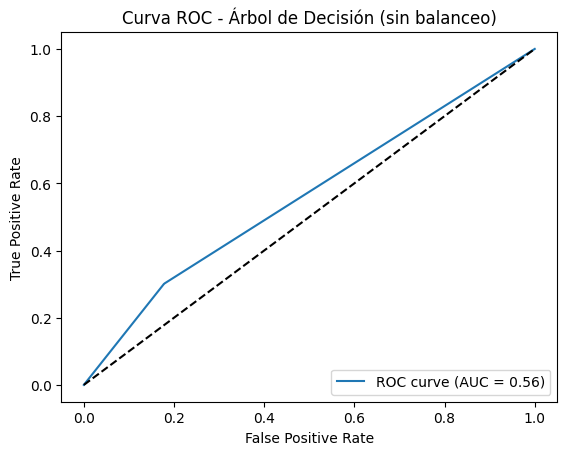


Matrix de confusión
[[83621 18115]
 [16257  7007]]

Matriz de confusión:


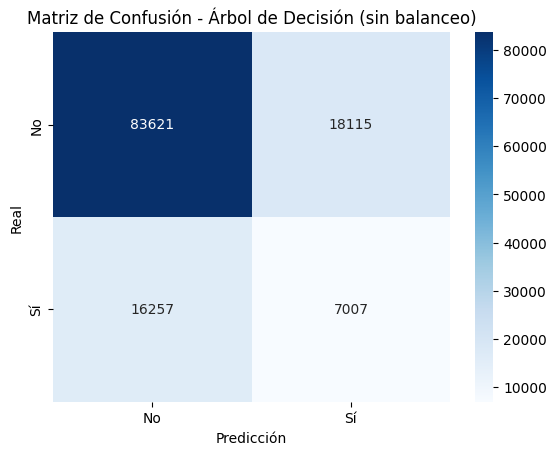


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83    101736
           1       0.28      0.30      0.29     23264

    accuracy                           0.73    125000
   macro avg       0.56      0.56      0.56    125000
weighted avg       0.73      0.73      0.73    125000



 Entrenando LightGBM sin balanceo
[LightGBM] [Info] Number of positive: 69791, number of negative: 305209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1691
[LightGBM] [Info] Number of data points in the train set: 375000, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186109 -> initscore=-1.475492
[LightGBM] [Info] Start training from score -1.475492

Mejores parámetros para LightGBM: {'classifier__l

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Evaluación del modelo LightGBM (sin balanceo):

Accuracy: 0.818
Precision: 0.669
Recall: 0.049
F1 Score: 0.091

AUC-ROC: 0.709


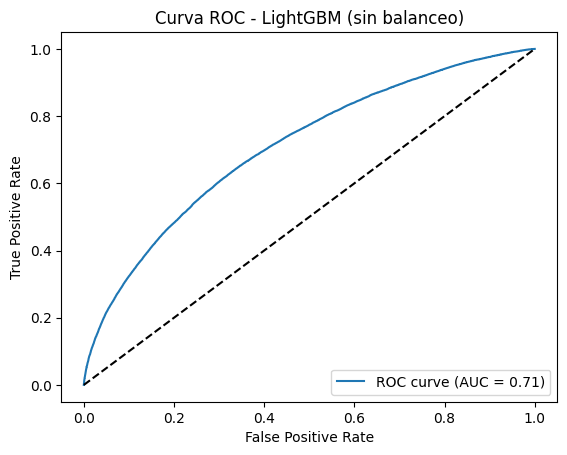


Matrix de confusión
[[101177    559]
 [ 22133   1131]]

Matriz de confusión:


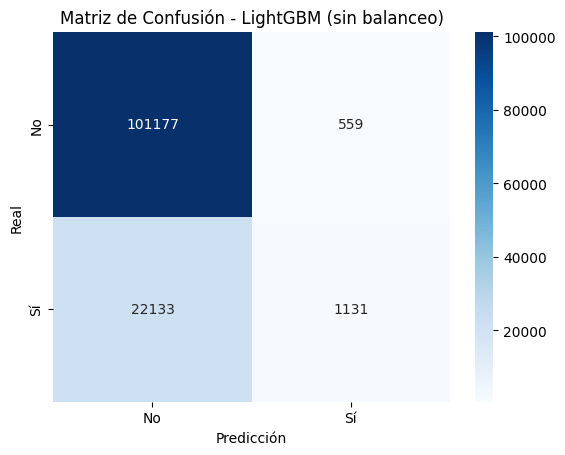


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90    101736
           1       0.67      0.05      0.09     23264

    accuracy                           0.82    125000
   macro avg       0.74      0.52      0.49    125000
weighted avg       0.79      0.82      0.75    125000



In [7]:
#Funcion para Evaluar el modelo
def evaluar_modelo(modelo, X_test, y_test, nombre_modelo):
    y_pred = modelo.predict(X_test)
    if hasattr(modelo, "predict_proba"):
        y_prob = modelo.predict_proba(X_test)[:, 1]
    elif hasattr(modelo, "decision_function"):
        y_prob = modelo.decision_function(X_test)
    else:
        y_prob = None

    print(f"\nEvaluación del modelo {nombre_modelo}:\n")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
    print("Precision:", round(precision_score(y_test, y_pred), 3))
    print("Recall:", round(recall_score(y_test, y_pred), 3))
    print("F1 Score:", round(f1_score(y_test, y_pred), 3))


    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print("\nAUC-ROC:", round(roc_auc, 3))

        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {nombre_modelo}')
        plt.legend(loc="lower right")
        plt.show()

    print('\nMatrix de confusión')
    print(confusion_matrix(y_test, y_pred))
    print("\nMatriz de confusión:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(f'Matriz de Confusión - {nombre_modelo}')
    plt.show()

    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred))

for nombre, data in modelos_param_grid.items():
    print(f"\n\n Entrenando {nombre} sin balanceo")
    preprocessor = get_preprocessor(nombre)
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('classifier', data["model"])
    ])
    grid = GridSearchCV(pipeline, param_grid=data["params"], scoring='f1', cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)

    print(f"\nMejores parámetros para {nombre}: {grid.best_params_}")
    print(f"\nMejor score F1 en validación: {grid.best_score_:.3f}")
    evaluar_modelo(grid.best_estimator_, X_test, y_test, f"{nombre} (sin balanceo)")

In [8]:
#Comparativa y visualización de importancia de variables

import warnings
warnings.filterwarnings("ignore")

#métricas de modelos ya evaluados
resultados_plus = []

#Diccionario para guardar modelos optimizados
modelos_optimizados = {}

for nombre, data in modelos_param_grid.items():
    print(f"Procesando métricas para: {nombre}")

    #Pipeline y gridsearch
    preprocessor = get_preprocessor(nombre)
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('classifier', data["model"])
    ])
    grid = GridSearchCV(pipeline, param_grid=data["params"], scoring='f1', cv=3, n_jobs=-1)
    grid.fit(X_train, y_train)

    modelo = grid.best_estimator_
    modelos_optimizados[nombre] = modelo

    y_pred = modelo.predict(X_test)
    y_prob = modelo.predict_proba(X_test)[:, 1] if hasattr(modelo, "predict_proba") else None
    roc_auc = auc(*roc_curve(y_test, y_prob)[:2]) if y_prob is not None else None

    resultados_plus.append({
        'Modelo': nombre,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc
    })

Procesando métricas para: Regresión Logística
Procesando métricas para: Hist Gradient Boosting
Procesando métricas para: Árbol de Decisión
Procesando métricas para: LightGBM
[LightGBM] [Info] Number of positive: 69791, number of negative: 305209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1691
[LightGBM] [Info] Number of data points in the train set: 375000, number of used features: 65
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.186109 -> initscore=-1.475492
[LightGBM] [Info] Start training from score -1.475492


In [9]:
#Tabla comparativa ordenada por F1 Score
df_plus = pd.DataFrame(resultados_plus)
df_plus = df_plus.sort_values(by="F1 Score", ascending=False)

print("\nComparativa Final de Modelos:")
display(df_plus.style.background_gradient(cmap="Blues"))


Comparativa Final de Modelos:


,Modelo,Accuracy,Precision,Recall,F1 Score,AUC-ROC
2,Árbol de Decisión,0.725024,0.278919,0.301195,0.289629,0.561565
3,LightGBM,0.818464,0.669231,0.048616,0.090647,0.709008
1,Hist Gradient Boosting,0.818152,0.662401,0.046725,0.087292,0.708844
0,Regresión Logística,0.813872,0.416667,0.000215,0.000430,0.636867


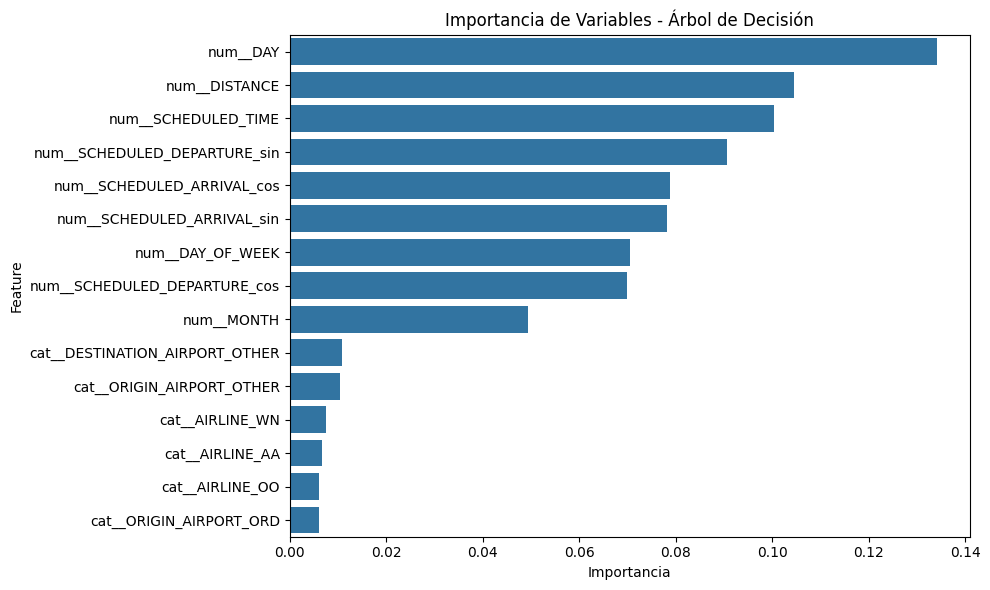

(Hist Gradient Boosting no soporta importancias de variables: 'HistGradientBoostingClassifier' object has no attribute 'feature_importances_')


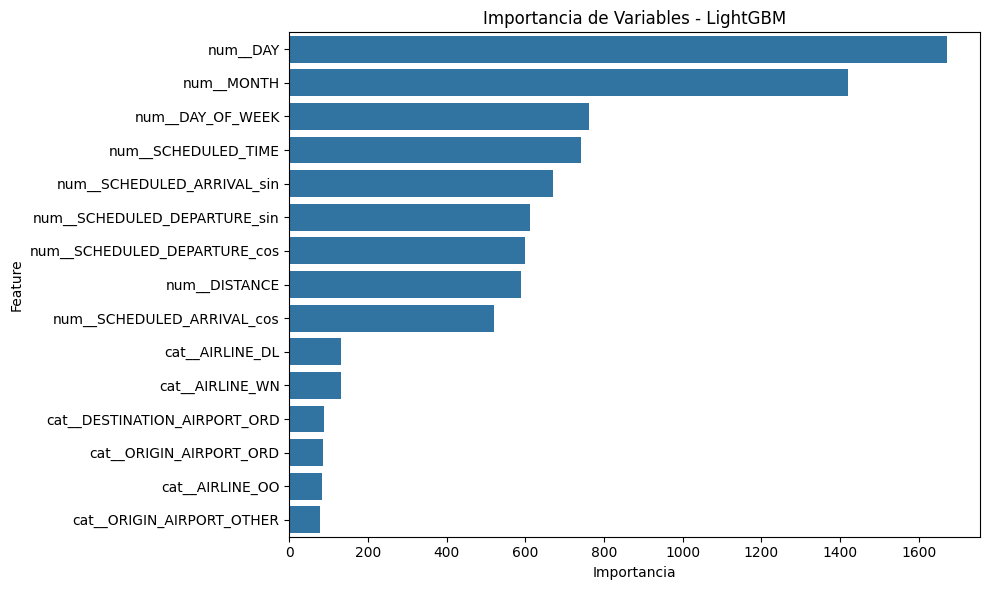

In [10]:
# Importancia de variables
def mostrar_importancia(modelo, nombre_modelo):
    try:
        importancias = modelo.named_steps['classifier'].feature_importances_
        nombres = modelo.named_steps['preprocessor'].get_feature_names_out()
        imp_df = pd.DataFrame({'Feature': nombres, 'Importancia': importancias})
        imp_df = imp_df.sort_values('Importancia', ascending=False).head(15)

        plt.figure(figsize=(10, 6))
        sns.barplot(data=imp_df, x="Importancia", y="Feature")
        plt.title(f"Importancia de Variables - {nombre_modelo}")
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"({nombre_modelo} no soporta importancias de variables: {e})")

# Mostrar solo para modelos tipo árbol
for nombre in ["Árbol de Decisión", "Hist Gradient Boosting", "LightGBM"]:
    if nombre in modelos_optimizados:
        mostrar_importancia(modelos_optimizados[nombre], nombre)

In [11]:
#Ejemplo predictivo simple de datos de un nuevo vuelo

nuevo_vuelo = pd.DataFrame([{
    'MONTH': 7,
    'DAY': 22,
    'DAY_OF_WEEK': 1,
    'DISTANCE': 950,
    'SCHEDULED_DEPARTURE': 830,  # 08:30 am
    'SCHEDULED_ARRIVAL': 1045,   # 10:45 am
    'AIRLINE': 'AA',
    'ORIGIN_AIRPORT': 'JFK',
    'DESTINATION_AIRPORT': 'LAX'
}])

#Calculamos el SCHEDULED_TIME (duración en minutos)
def calcular_scheduled_time(dep, arr):
    dep = int(str(dep).zfill(4))
    arr = int(str(arr).zfill(4))
    dep_min = (dep // 100) * 60 + (dep % 100)
    arr_min = (arr // 100) * 60 + (arr % 100)
    if arr_min < dep_min:  # caso de vuelos que cruzan medianoche
        arr_min += 1440
    return arr_min - dep_min

nuevo_vuelo['SCHEDULED_TIME'] = calcular_scheduled_time(
    nuevo_vuelo['SCHEDULED_DEPARTURE'].iloc[0],
    nuevo_vuelo['SCHEDULED_ARRIVAL'].iloc[0]
)

# Aplicamos la transformación trigonométrica
def transformar_hora(df, columna):
    df[columna] = df[columna].astype(str).str.zfill(4)
    minutos = df[columna].str[:2].astype(int) * 60 + df[columna].str[2:].astype(int)
    df[columna + '_sin'] = np.sin(2 * np.pi * minutos / 1440)
    df[columna + '_cos'] = np.cos(2 * np.pi * minutos / 1440)
    return df

nuevo_vuelo = transformar_hora(nuevo_vuelo, 'SCHEDULED_DEPARTURE')
nuevo_vuelo = transformar_hora(nuevo_vuelo, 'SCHEDULED_ARRIVAL')

#Eliminamos columnas originales que no usa el modelo
nuevo_vuelo.drop(columns=['SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL'], inplace=True)

#Predecimos con el mejor modelo
modelo_final = modelos_optimizados['Árbol de Decisión']
prediccion = modelo_final.predict(nuevo_vuelo)
probabilidad = modelo_final.predict_proba(nuevo_vuelo)[:, 1]

#Interpretamos resultado
print(f"¿Vuelo retrasado?: {'Sí' if prediccion[0] == 1 else 'No'}")
print(f"Probabilidad de retraso: {probabilidad[0]:.2f}")

¿Vuelo retrasado?: No
Probabilidad de retraso: 0.00
